In [2]:
import multirex as mrex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

First we can create the components of a planetary system.

In [6]:
star=mrex.Star(temperature=5777,radius=1,mass=1)
planet=mrex.Planet(radius=1,mass=1)
system=mrex.System(star=star,planet=planet,sma=1)




We can create an atmosphere with a fill gas and other molecules dictionary specifying a range or value of log10 mixing ratio for each molecule.

In [8]:
atmo=mrex.Atmosphere(temperature=288,base_pressure=1e5,top_pressure=1,
                     fill_gas="N2",composition={"CO2":(-4,-1),"H2O":(-4,-2),
                                                "CH4":(-6,-3),"O3":-6})

system.planet.set_atmosphere(atmo)

Now we can initialize our model and use the other features of multirex.

In [9]:
system.make_transmission_model()

For example we can visualize the spectrum of the planet. But first we must define a range of wavenumbers, we can use the `wavenumber_grid` function to do this.

In [10]:
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)

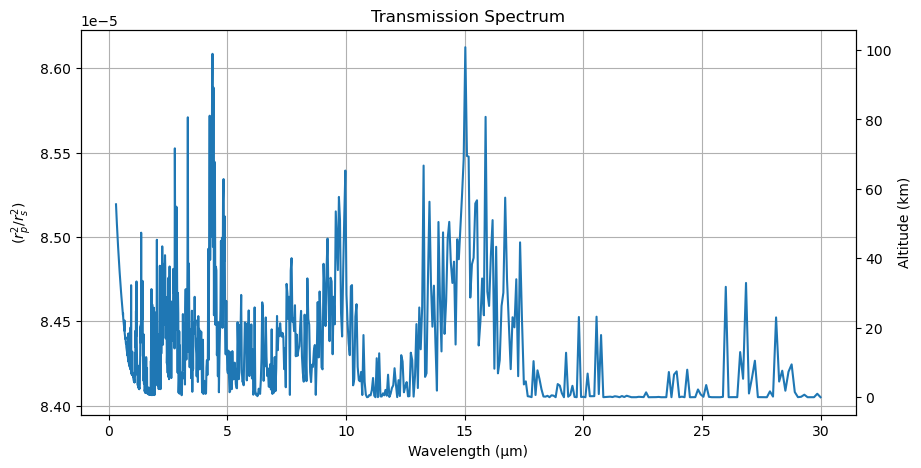

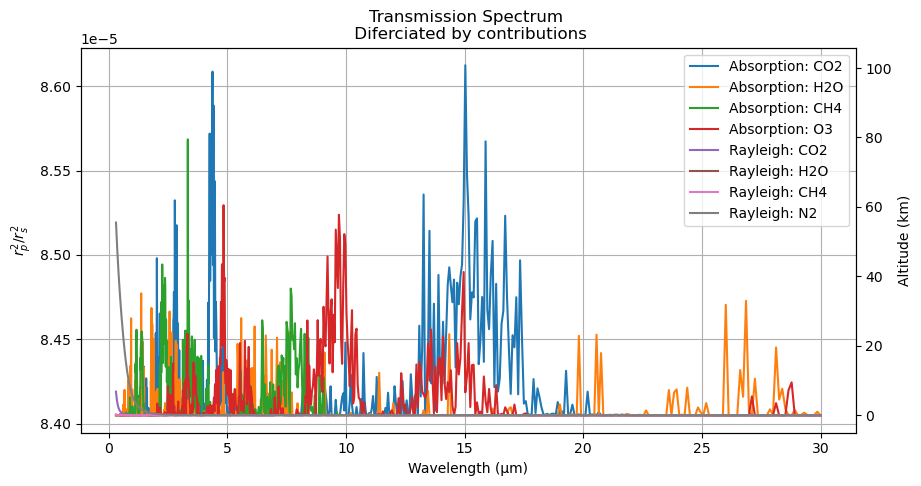

(<Axes: title={'center': 'Transmission Spectrum \n Diferciated by contributions'}, xlabel='Wavelength (μm)', ylabel='$r_p^2$/$r_s^2$'>,
 <Figure size 1000x500 with 2 Axes>)

In [13]:
system.plot_spectrum(wn_grid=wn,title="Transmission Spectrum")

system.plot_full_spectrum(wn_grid=wn,title="Transmission Spectrum \n Diferciated by contributions")

Now we can generate a dataset spectra varying the parameters who we define as a range, and addionally we can add noise based on the signal to noise ratio to generate a set of observations.

Optionally we can add a label based on the presence of a molecule in the atmosphere.


In [19]:
spectra,obs=system.explore_multiverse(wn_grid=wn,snr=10,n_iter=10, labels="O3",
                                      n_observations=1000,spectra=True,observations=True,header=True)

Exploring universes: 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]


Generating observations for 10 spectra...


In [20]:
spectra

,sma,seed,p radius,p mass,p seed,atm temperature,atm base_pressure,atm top_pressure,atm fill_gas,atm seed,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
1,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
3,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
5,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
6,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
7,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
8,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


In [29]:
list(obs.columns)

['sma',
 'seed',
 'p radius',
 'p mass',
 'p seed',
 'atm temperature',
 'atm base_pressure',
 'atm top_pressure',
 'atm fill_gas',
 'atm seed',
 'atm CO2',
 'atm H2O',
 'atm CH4',
 'atm O3',
 's temperature',
 's radius',
 's mass',
 's seed',
 'label',
 'SNR',
 29.999999999999996,
 29.862024862864565,
 29.72468429701139,
 29.58797538393846,
 29.451895218566502,
 29.31644090917717,
 29.181609577351622,
 29.04739835790937,
 28.913804398847354,
 28.780824861279424,
 28.648456919375892,
 28.516697760303586,
 28.385544584165988,
 28.25499460394385,
 28.12504504543585,
 27.995693147199713,
 27.866936160493502,
 27.73877134921721,
 27.61119598985466,
 27.484207371415547,
 27.35780279537789,
 27.23197957563068,
 27.106735038416772,
 26.982066522276128,
 26.857971377989184,
 26.7344469685206,
 26.611490668963217,
 26.48909986648226,
 26.36727196025986,
 26.246004361439727,
 26.125294493072168,
 26.00513979005933,
 25.88553769910067,
 25.766485678638745,
 25.64798119880514,
 25.530021741366735

In [23]:
obs["atm CO2"].value_counts()

-3.133416    1000
-2.771795    1000
-3.403063    1000
-2.384707    1000
-2.709345    1000
-3.762223    1000
-1.567242    1000
-2.912508    1000
-3.520320    1000
-2.093464    1000
Name: atm CO2, dtype: int64

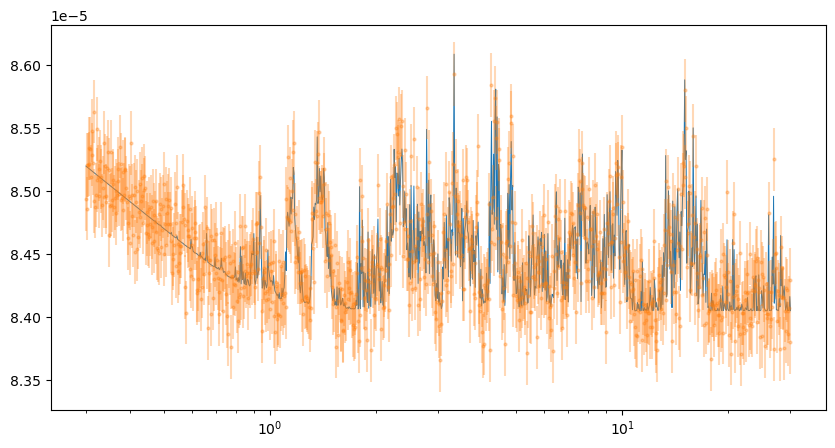

In [37]:
##
plt.figure(figsize=(10,5))
plt.plot(spectra.iloc[0,-1000:],label="True Spectrum",linewidth=0.7)
plt.errorbar(x=1e4/wn,y=obs.iloc[0,-1000:],yerr=(max(obs.iloc[1,-1000:])-min(obs.iloc[1,-1000:]))/obs.loc[0,"SNR"]
             ,label="Observed Spectrum",fmt="o",markersize=2,alpha=0.3)
plt.xscale("log")